In [1]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

In [2]:
!nvidia-smi

Sat Nov  2 12:02:03 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...    Off |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8              5W /  320W |    5508MiB /  16376MiB |      9%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Loading the dataset**

In [3]:
class MVTecDataset(Dataset):
    def __init__(self, root_dir, phase, transform):
        self.root_dir = root_dir
        self.phase = phase
        self.transform = transform

        self.image_paths = []
        self.clean_paths = []
        self.mask_paths = []

        # Iterate through all classes in the root directory
        self.classes = os.listdir(root_dir)
        for class_name in self.classes:
            class_path = os.path.join(root_dir, class_name)
            phase_dir = os.path.join(class_path, self.phase)

            # Check if phase_dir exists
            if os.path.exists(phase_dir):
                print(f"Processing class: {class_name} in {phase_dir}")  # Debugging statement
                
                for folder_type in ['Defect_mask', 'Degraded_image', 'GT_clean_image']:
                    self._load_images_for_folder_type(phase_dir, folder_type)

    def _load_images_for_folder_type(self, phase_dir, folder_type):
        folder_path = os.path.join(phase_dir, folder_type)
        print(f"Looking for folder: {folder_path}")  # Debugging statement

        # Ensure the folder exists before loading
        if os.path.exists(folder_path):
            for defect_type in os.listdir(folder_path):
                subfolder_path = os.path.join(folder_path, defect_type)
                print(f"Checking subfolder: {subfolder_path}")  # Debugging statement

                # Ensure subfolder exists
                if os.path.isdir(subfolder_path):
                    for image_name in os.listdir(subfolder_path):
                        image_path = os.path.join(subfolder_path, image_name)

                        # Append paths based on the folder type
                        if folder_type == 'Degraded_image':
                            self.image_paths.append(image_path)
                        elif folder_type == 'GT_clean_image':
                            self.clean_paths.append(image_path)
                        elif folder_type == 'Defect_mask':
                            self.mask_paths.append(image_path)

                    # Print how many images were loaded from each subfolder
                    print(f"Loaded {len(os.listdir(subfolder_path))} images from {subfolder_path}")
                              #Ensure all paths are loaded consistently
                    print(f"Loaded {len(self.image_paths)} degraded images, {len(self.clean_paths)} clean images, {len(self.mask_paths)} masks from {folder_type}.")
        else:
            print(f"Folder does not exist: {folder_path}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load images using PIL
        degraded_image = Image.open(self.image_paths[idx]).convert('RGB')
        clean_image = Image.open(self.clean_paths[idx]).convert('RGB')
        mask_image = Image.open(self.mask_paths[idx])  # Grayscale mask

        # Apply any transformations if specified
        if self.transform:
            degraded_image = self.transform(degraded_image)
            clean_image = self.transform(clean_image)
            mask_image = self.transform(mask_image)

        return degraded_image, clean_image, mask_image


In [4]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [5]:
dataset_path = '/home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val'

In [6]:
# Create dataset for training data
train_dataset = MVTecDataset(root_dir=dataset_path, phase='Train', transform=transform)

Processing class: grid in /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Train
Looking for folder: /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Train/Defect_mask
Checking subfolder: /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Train/Defect_mask/metal_contamination
Loaded 8 images from /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Train/Defect_mask/metal_contamination
Loaded 0 degraded images, 0 clean images, 8 masks from Defect_mask.
Checking subfolder: /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Train/Defect_mask/bent
Loaded 9 images from /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Train/Defect_mask/bent
Loaded 0 degraded images, 0 clean images, 17 masks from Defect_mask.
Checking subfolder: /home

In [7]:
print(f"Total number of degraded images: {len(train_dataset.image_paths)}")
print(f"Total number of clean images: {len(train_dataset.clean_paths)}")
print(f"Total number of defect masks: {len(train_dataset.mask_paths)}")

Total number of degraded images: 932
Total number of clean images: 932
Total number of defect masks: 932


In [8]:
# Create dataset for validation data
val_dataset = MVTecDataset(root_dir=dataset_path, phase='Val', transform=transform)

Processing class: grid in /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Val
Looking for folder: /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Val/Defect_mask
Checking subfolder: /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Val/Defect_mask/metal_contamination
Loaded 1 images from /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Val/Defect_mask/metal_contamination
Loaded 0 degraded images, 0 clean images, 1 masks from Defect_mask.
Checking subfolder: /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Val/Defect_mask/bent
Loaded 1 images from /home/user/Downloads/Deep_learning_for_imaging/Class_project/Denoising_Dataset_train_val/grid/Val/Defect_mask/bent
Loaded 0 degraded images, 0 clean images, 2 masks from Defect_mask.
Checking subfolder: /home/user/Downloa

In [9]:
print(f"Total number of degraded images: {len(val_dataset.image_paths)}")
print(f"Total number of clean images: {len(val_dataset.clean_paths)}")
print(f"Total number of defect masks: {len(val_dataset.mask_paths)}")


Total number of degraded images: 88
Total number of clean images: 88
Total number of defect masks: 88


In [10]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

Displaying sample images

In [11]:

degraded_img, clean_img, mask_img = train_dataset[0]  # Access the first sample


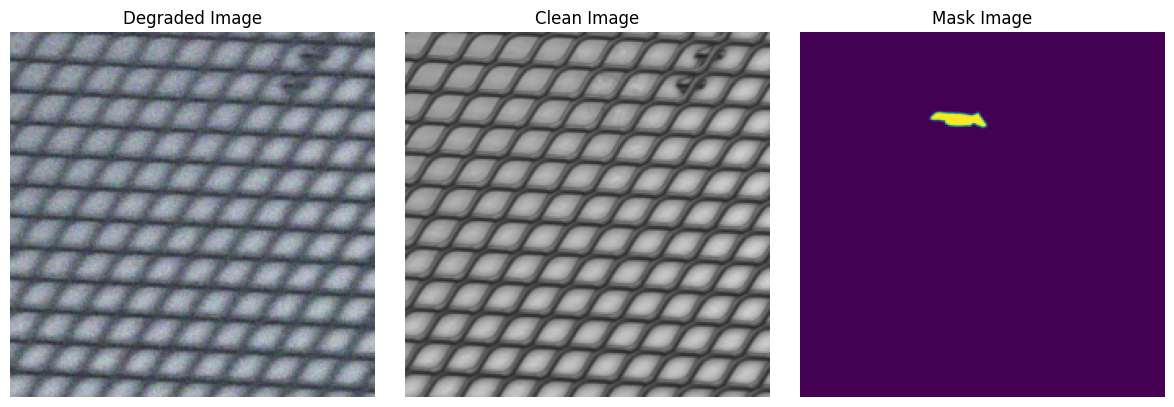

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Transpose images if needed (assuming they are (3, 224, 224))
degraded_img = np.transpose(degraded_img, (1, 2, 0))
clean_img = np.transpose(clean_img, (1, 2, 0))
mask_img = np.transpose(mask_img, (1, 2, 0))

# Set up a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot each image in a separate subplot
axs[0].imshow(degraded_img)
axs[0].axis('off')
axs[0].set_title('Degraded Image')

axs[1].imshow(clean_img)
axs[1].axis('off')
axs[1].set_title('Clean Image')

axs[2].imshow(mask_img)
axs[2].axis('off')
axs[2].set_title('Mask Image')

plt.tight_layout()  # Optional: adjusts spacing between plots for a cleaner look
plt.show()



In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# import skimage.metrics

# def calculate_metrics(original, restored):
#     # Ensure images are in float32 format
#     original = original.astype(np.float32)
#     restored = restored.astype(np.float32)

#     # Ensure the images are in the expected range
#     original = np.clip(original, 0, 1)
#     restored = np.clip(restored, 0, 1)

#     # Calculate PSNR
#     psnr = skimage.metrics.peak_signal_noise_ratio(original, restored, data_range=1.0)

#     # Debugging: Print shapes and dtypes
#     print(f"Original shape: {original.shape}, Restored shape: {restored.shape}")
#     print(f"Original dtype: {original.dtype}, Restored dtype: {restored.dtype}")

#     # Use a fixed win_size for SSIM
#     win_size = 11  # Set this to a fixed odd value for larger images

#     # Calculate SSIM
#     ssim = skimage.metrics.structural_similarity(
#         original,
#         restored,
#         multichannel=True,
#         win_size=win_size,
#         data_range=1.0,
#         channel_axis=0  # Specify channel_axis for multichannel images
#     )
    
#     return psnr, ssim


In [14]:
import skimage.metrics
import numpy as np

def calculate_metrics(original, restored):
    # Ensure images are in float32 format
    original = original.astype(np.float32)
    restored = restored.astype(np.float32)

    # Ensure the images are in the expected range
    original = np.clip(original, 0, 1)
    restored = np.clip(restored, 0, 1)

    # Calculate PSNR
    psnr_value = skimage.metrics.peak_signal_noise_ratio(original, restored, data_range=1.0)

    # Debugging: Print shapes and dtypes
    print(f"Original shape: {original.shape}, Restored shape: {restored.shape}")
    print(f"Original dtype: {original.dtype}, Restored dtype: {restored.dtype}")

    # Dynamically adjust win_size for SSIM
    min_dim = min(original.shape[:2])  # Get the smallest dimension
    win_size = min(11, min_dim) if min_dim % 2 == 1 else min(11, min_dim - 1)

    # Calculate SSIM with appropriate parameters
    ssim_value = skimage.metrics.structural_similarity(
        original,
        restored,
        data_range=1.0,
        win_size=win_size,
        channel_axis=-1  # Set to -1 if channels are in the last dimension
    )
    
    return psnr_value, ssim_value


**Using Autoencoder**

In [15]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # (N, 3, H, W) -> (N, 64, H, W)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # (N, 64, H, W) -> (N, 128, H, W)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # (N, 128, H, W) -> (N, 256, H/2, W/2)
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # (N, 256, H/2, W/2) -> (N, 128, H, W)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1, padding=1),  # (N, 128, H, W) -> (N, 64, H, W)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=1, padding=1),  # (N, 64, H, W) -> (N, 3, H, W)
            nn.Sigmoid(),  # Normalize output to [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [27]:
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader

# Assuming `train_dataset` is already defined
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize the model, loss function, and optimizer
model_AE = Autoencoder().to(device)  # Use GPU if available
criterion = nn.MSELoss()
optimizer = optim.Adam(model_AE.parameters(), lr=1e-3)

num_epochs = 15  # Set the number of epochs
for epoch in range(num_epochs):
    for degraded, clean, mask in train_loader:
        degraded, clean = degraded.to(device), clean.to(device)

        # Forward pass
        outputs = model_AE(degraded)
        loss = criterion(outputs, clean)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/15], Loss: 0.0058
Epoch [2/15], Loss: 0.0035
Epoch [3/15], Loss: 0.0031
Epoch [4/15], Loss: 0.0038
Epoch [5/15], Loss: 0.0012
Epoch [6/15], Loss: 0.0012
Epoch [7/15], Loss: 0.0022
Epoch [8/15], Loss: 0.0015
Epoch [9/15], Loss: 0.0018
Epoch [10/15], Loss: 0.0026
Epoch [11/15], Loss: 0.0013
Epoch [12/15], Loss: 0.0021
Epoch [13/15], Loss: 0.0023
Epoch [14/15], Loss: 0.0029
Epoch [15/15], Loss: 0.0022


In [ ]:
#Saving the model
torch.save(model_AE, 'ae_model_full.pth')  #Saving entire model
torch.save(model_AE.state_dict(), 'ae_model_weights.pth') #Saving only weights

In [16]:
#Loading the model
#Loading from the entire model
# Load the entire model
model_AE = torch.load('ae_model_full.pth')
model_AE = model_AE.to(device)  # Move to the appropriate device
#model_AE.eval()  # Set to evaluation mode for inference


/tmp/ipykernel_2532297/3174936428.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_AE = torch.load('ae_model_full.pth')


In [17]:
#Loading from only the weights
# Initialize the model (redefine architecture)
model_AE = Autoencoder().to(device)

# Load the state dictionary (weights)
model_AE.load_state_dict(torch.load('ae_model_weights.pth'))

# Set to evaluation mode for inference
#model_AE.eval()



/tmp/ipykernel_2532297/3505085576.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_AE.load_state_dict(torch.load('ae_model_weights.pth'))


<All keys matched successfully>

In [21]:
import matplotlib.pyplot as plt
# Load test or validation dataset
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)  #Currently given bathc_size = 1

psnr_values = []
ssim_values = []

with torch.no_grad():
    for degraded, clean, mask in val_loader:
        degraded = degraded.to(device)
        outputs = model_AE(degraded)

        # Convert tensors to numpy arrays for each image in the batch
        output_images = outputs.cpu().numpy()
        clean_images = clean.cpu().numpy()
        mask_images = mask.cpu().numpy()

        # Loop through each image in the batch
        for i in range(output_images.shape[0]):
            output_image = output_images[i].squeeze()
            clean_image = clean_images[i].squeeze()
            mask_image = mask_images[i].squeeze()

            # Check image shapes before calculating metrics
            print(f'Clean image shape: {clean_image.shape}')
            print(f'Output image shape: {output_image.shape}')
            print(f'Mask image shape: {mask_image.shape}')


            # Calculate metrics for each image
            psnr, ssim = calculate_metrics(clean_image, output_image)
            print(f'PSNR: {psnr}, SSIM: {ssim}')

            # Transpose if necessary for visualization
            output_img = np.transpose(output_image, (1, 2, 0)) if output_image.ndim == 3 else output_image
            clean_img = np.transpose(clean_image, (1, 2, 0)) if clean_image.ndim == 3 else clean_image
            mask_img = np.transpose(mask_image, (1, 2, 0)) if mask_image.ndim == 3 else mask_image

            # # Set up a figure with 1 row and 3 columns
            # fig, axs = plt.subplots(1, 3, figsize=(12, 4))

            # # Plot each image in a separate subplot
            # axs[0].imshow(output_img)
            # axs[0].axis('off')
            # axs[0].set_title('Output Image')

            # axs[1].imshow(clean_img)
            # axs[1].axis('off')
            # axs[1].set_title('Clean Image')

            # axs[2].imshow(mask_img, cmap='gray')
            # axs[2].axis('off')
            # axs[2].set_title('Mask Image')

            # plt.tight_layout()
            # plt.show()

            psnr_values.append(psnr)
            ssim_values.append(ssim)

    # Calculate average PSNR and SSIM
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

# Print average values
print(f"Average PSNR for the entire test set: {average_psnr:.2f}")
print(f"Average SSIM for the entire test set: {average_ssim:.2f}")


Clean image shape: (3, 224, 224)
Output image shape: (3, 224, 224)
Mask image shape: (224, 224)
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
PSNR: 24.86639991494414, SSIM: 0.7062031626701355
Clean image shape: (3, 224, 224)
Output image shape: (3, 224, 224)
Mask image shape: (224, 224)
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
PSNR: 25.339975729830243, SSIM: 0.6866984963417053
Clean image shape: (3, 224, 224)
Output image shape: (3, 224, 224)
Mask image shape: (224, 224)
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
PSNR: 24.44571687530914, SSIM: 0.6778573989868164
Clean image shape: (3, 224, 224)
Output image shape: (3, 224, 224)
Mask image shape: (224, 224)
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
PSNR: 24.58582485697878, 

In [ ]:
import matplotlib.pyplot as plt

psnr_values_defect = []
ssim_values_defect = []

with torch.no_grad():
    for degraded, clean, mask in val_loader:
        degraded = degraded.to(device)
        outputs = model_AE(degraded)

        # Convert tensors to numpy arrays while keeping the batch dimension
        output_images = outputs.cpu().numpy()  # Shape: (batch_size, C, H, W)
        clean_images = clean.cpu().numpy()
        mask_images = mask.cpu().numpy()

        for i in range(output_images.shape[0]):  # Loop over each image in the batch
            output_image = output_images[i]  # Shape: (C, H, W)
            clean_image = clean_images[i]
            mask_image = mask_images[i]

            # Isolate defect regions using the mask
            defect_region_output = output_image * mask_image
            defect_region_clean = clean_image * mask_image

            # Calculate PSNR and SSIM over defect regions only
            psnr_defect, ssim_defect = calculate_metrics(defect_region_clean, defect_region_output)
            print(f'Defect PSNR: {psnr_defect}, Defect SSIM: {ssim_defect}')

            # Transpose for displaying with matplotlib
            defect_region_output = np.transpose(defect_region_output, (1, 2, 0))  # (H, W, C)
            defect_region_clean = np.transpose(defect_region_clean, (1, 2, 0))


            # # Display defect regions
            # fig, axs = plt.subplots(1, 2, figsize=(8, 4))
            # axs[0].imshow(defect_region_clean)
            # axs[0].axis('off')
            # axs[0].set_title('Defect Region Clean')

            # axs[1].imshow(defect_region_output)
            # axs[1].axis('off')
            # axs[1].set_title('Defect Region Output')

            # plt.tight_layout()
            # plt.show()

            # Append to lists
            psnr_values_defect.append(psnr_defect)
            ssim_values_defect.append(ssim_defect)

    # Calculate average defect PSNR and SSIM
    average_psnr_defect = np.mean(psnr_values_defect)
    average_ssim_defect = np.mean(ssim_values_defect)

# Print or save the defect-specific average PSNR and SSIM
print(f"Average PSNR for defect regions: {average_psnr_defect:.2f}")
print(f"Average SSIM for defect regions: {average_ssim_defect:.2f}")


Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Defect PSNR: 48.782529380864865, Defect SSIM: 0.9993160367012024
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Defect PSNR: 41.25866269306716, Defect SSIM: 0.9934260249137878
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Defect PSNR: 45.893311167285475, Defect SSIM: 0.9985842108726501
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Defect PSNR: 40.678256027316586, Defect SSIM: 0.9956241250038147
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Defect PSNR: 44.78142436713533, Defect SSIM: 0.9982795715332031
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Defect PSNR: 45.2

Saving output images and average PSNR and average SSIM values in a folder

In [41]:
import os
# from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Set up output folder
output_folder = "output_images"
os.makedirs(output_folder, exist_ok=True)

# Initialize lists to hold PSNR and SSIM values
psnr_values = []
ssim_values = []

# Initialize file for saving PSNR and SSIM metrics
metrics_file = os.path.join(output_folder, "metrics.txt")
with open(metrics_file, "w") as f:
    f.write("PSNR and SSIM values for each test image:\n\n")

# Set win_size based on the smallest dimension of your images
smallest_dimension = min(clean_image.shape[:2])
win_size = smallest_dimension if smallest_dimension % 2 == 1 else smallest_dimension - 1

with torch.no_grad():
    for idx, (degraded, clean, mask) in enumerate(val_loader):
        degraded = degraded.to(device)
        outputs = model_AE(degraded)

        # Convert tensors to numpy arrays
        output_image = outputs.cpu().numpy().squeeze()
        clean_image = clean.cpu().numpy().squeeze()
        mask_image = mask.cpu().numpy().squeeze()

        # Save output image to the folder
        output_path = os.path.join(output_folder, f"output_image_{idx}.png")
        plt.imsave(output_path, output_image if output_image.ndim == 2 else np.transpose(output_image, (1, 2, 0)))

        # Calculate PSNR and SSIM over the entire image and defect regions

        psnr_value, ssim_value = calculate_metrics(clean_image, output_image)
        
        # psnr_value = psnr(clean_image, output_image, data_range=clean_image.max() - clean_image.min())
        # ssim_value = ssim(clean_image, output_image, win_size=win_size, channel_axis=-1 if clean_image.ndim == 3 else None)

        psnr_defect, ssim_defect = calculate_metrics(defect_region_clean, defect_region_output)

        # psnr_defect = psnr(defect_region_clean, defect_region_output, data_range=clean_image.max() - clean_image.min())
        # ssim_defect = ssim(defect_region_clean, defect_region_output, win_size=win_size, channel_axis=-1 if defect_region_clean.ndim == 3 else None)

        # Append the metrics
        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)

        # Write metrics for each image to the file
        with open(metrics_file, "a") as f:
            f.write(f"Image {idx + 1}: PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.4f}\n")
            f.write(f"Defect Region: PSNR = {psnr_defect:.2f}, SSIM = {ssim_defect:.4f}\n\n")
    
    # Calculate and save average PSNR and SSIM
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

    # Write average metrics to the file
    with open(metrics_file, "a") as f:
        f.write("\nAverage PSNR and SSIM for the entire test set:\n")
        f.write(f"Average PSNR: {average_psnr:.2f}\n")
        f.write(f"Average SSIM: {average_ssim:.4f}\n")

# Print average values
print(f"Average PSNR for the entire validation set: {average_psnr:.2f}")
print(f"Average SSIM for the entire validation set: {average_ssim:.2f}")


Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original shape: (3, 224, 224), Restored shape: (3, 224, 224)
Original dtype: float32, Restored dtype: float32
Original s

**Using vision transformer - Experimental**

In [24]:
import torch
import torch.nn as nn
import timm
import torch.optim as optim

class ViTModel(nn.Module):
    def __init__(self):
        super(ViTModel, self).__init__()
        self.vit = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=0)  # Remove classification head
        self.fc = nn.Linear(768, 3 * 224 * 224)  # Output to image size

    def forward(self, x):
        # Get features from the ViT
        x = self.vit(x)

        # Pass through a linear layer to get the desired output size
        x = self.fc(x)
        x = x.view(-1, 3, 224, 224)  # Reshape to image dimensions
        return x


/home/user/anaconda3/envs/deeplearning_imaging/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Initialize the ViT model
model = ViTModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 15

for epoch in range(num_epochs):
    for degraded, clean, mask in train_loader:
        degraded, clean = degraded.to(device), clean.to(device)

        # Forward pass
        outputs = model(degraded)
        loss = criterion(outputs, clean)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
#Saving the model
torch.save(model, 'vit_model_full.pth')  #Saving entire model
torch.save(model.state_dict(), 'vit_model_weights.pth') #Saving only weights

In [ ]:
#Loading the model
#Loading from the entire model
# Load the entire model
model = torch.load('vit_model_full.pth')
model = model.to(device)  # Move to the appropriate device
#model.eval()  # Set to evaluation mode for inference

In [25]:
#Loading from only the weights
# Initialize the model (redefine architecture)
model = ViTModel().to(device)

# Load the state dictionary (weights)
model.load_state_dict(torch.load('vit_model_weights.pth'))

# Set to evaluation mode for inference
#model.eval()

/tmp/ipykernel_2432273/2115376691.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('vit_model_weights.pth'))


<All keys matched successfully>

In [ ]:
import matplotlib.pyplot as plt
# Load test or validation dataset
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)  #Currently given bathc_size = 1

psnr_values = []
ssim_values = []

with torch.no_grad():
    for degraded, clean, mask in val_loader:
        degraded = degraded.to(device)
        outputs = model(degraded)

        # Convert tensors to numpy arrays for each image in the batch
        output_images = outputs.cpu().numpy()
        clean_images = clean.cpu().numpy()
        mask_images = mask.cpu().numpy()

        # Loop through each image in the batch
        for i in range(output_images.shape[0]):
            output_image = output_images[i].squeeze()
            clean_image = clean_images[i].squeeze()
            mask_image = mask_images[i].squeeze()

            # Check image shapes before calculating metrics
            print(f'Clean image shape: {clean_image.shape}')
            print(f'Output image shape: {output_image.shape}')
            print(f'Mask image shape: {mask_image.shape}')


            # Calculate metrics for each image
            psnr, ssim = calculate_metrics(clean_image, output_image)
            print(f'PSNR: {psnr}, SSIM: {ssim}')

            # Transpose if necessary for visualization
            output_img = np.transpose(output_image, (1, 2, 0)) if output_image.ndim == 3 else output_image
            clean_img = np.transpose(clean_image, (1, 2, 0)) if clean_image.ndim == 3 else clean_image
            mask_img = np.transpose(mask_image, (1, 2, 0)) if mask_image.ndim == 3 else mask_image

            # Set up a figure with 1 row and 3 columns
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))

            # Plot each image in a separate subplot
            axs[0].imshow(output_img)
            axs[0].axis('off')
            axs[0].set_title('Output Image')

            axs[1].imshow(clean_img)
            axs[1].axis('off')
            axs[1].set_title('Clean Image')

            axs[2].imshow(mask_img, cmap='gray')
            axs[2].axis('off')
            axs[2].set_title('Mask Image')

            plt.tight_layout()
            plt.show()

            psnr_values.append(psnr)
            ssim_values.append(ssim)

    # Calculate average PSNR and SSIM
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

# Print average values
print(f"Average PSNR for the entire test set: {average_psnr:.2f}")
print(f"Average SSIM for the entire test set: {average_ssim:.2f}")


In [ ]:
import matplotlib.pyplot as plt

psnr_values_defect = []
ssim_values_defect = []

with torch.no_grad():
    for degraded, clean, mask in val_loader:
        degraded = degraded.to(device)
        outputs = model(degraded)

        # Convert tensors to numpy arrays while keeping the batch dimension
        output_images = outputs.cpu().numpy()  # Shape: (batch_size, C, H, W)
        clean_images = clean.cpu().numpy()
        mask_images = mask.cpu().numpy()

        for i in range(output_images.shape[0]):  # Loop over each image in the batch
            output_image = output_images[i]  # Shape: (C, H, W)
            clean_image = clean_images[i]
            mask_image = mask_images[i]

            # Isolate defect regions using the mask
            defect_region_output = output_image * mask_image
            defect_region_clean = clean_image * mask_image

            # Transpose for displaying with matplotlib
            defect_region_output = np.transpose(defect_region_output, (1, 2, 0))  # (H, W, C)
            defect_region_clean = np.transpose(defect_region_clean, (1, 2, 0))

            # Calculate PSNR and SSIM over defect regions only
            psnr_defect, ssim_defect = calculate_metrics(defect_region_clean, defect_region_output)
            print(f'Defect PSNR: {psnr_defect}, Defect SSIM: {ssim_defect}')

            # Display defect regions
            fig, axs = plt.subplots(1, 2, figsize=(8, 4))
            axs[0].imshow(defect_region_clean)
            axs[0].axis('off')
            axs[0].set_title('Defect Region Clean')

            axs[1].imshow(defect_region_output)
            axs[1].axis('off')
            axs[1].set_title('Defect Region Output')

            plt.tight_layout()
            plt.show()

            # Append to lists
            psnr_values_defect.append(psnr_defect)
            ssim_values_defect.append(ssim_defect)

    # Calculate average defect PSNR and SSIM
    average_psnr_defect = np.mean(psnr_values_defect)
    average_ssim_defect = np.mean(ssim_values_defect)

# Print or save the defect-specific average PSNR and SSIM
print(f"Average PSNR for defect regions: {average_psnr_defect:.2f}")
print(f"Average SSIM for defect regions: {average_ssim_defect:.2f}")
